In [110]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from glob import glob
from pathlib import Path
from cycler import cycler
from scipy.signal import medfilt
from scipy.optimize import curve_fit
%matplotlib inline

Load data:

In [111]:
filename_list=glob('./data/*.txt')

In [112]:
data={}
for file in filename_list:
    test_name=file[7:-4]
    data[test_name]=np.loadtxt(file, skiprows=1)

In [113]:
def plot_values(values):
    strain=values[:,0]
    stress=values[:,1]
    plt.plot(strain, stress,'--')

In [114]:
def plot_data(data):
    fig,ax= plt.subplots()
    ax.set_prop_cycle(custom_cycler)
    for test, values in sorted(data.items()):
        eng_strain=values[:,0]/100
        strain=np.log(1+eng_strain)
        eng_stress=values[:,1]
        stress=eng_stress*(1+eng_strain)
        ax.plot(strain[::10], stress[::10], lw=2)
    ax.set_ylabel('Stress (MPa)')
    ax.set_xlabel('Strain')
    ax.set_axisbelow(True)
    ax.yaxis.grid(color='gray', linestyle='dashed',alpha=0.5)
    ax.xaxis.grid(color='gray', linestyle='dashed', alpha=0.5)
    plt.legend(sorted(data.keys()))
    return fig

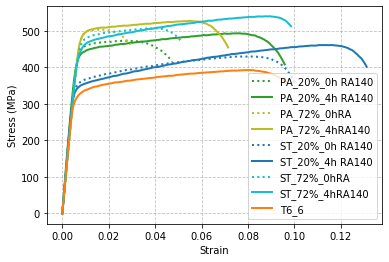

In [115]:
custom_cycler = (cycler(color=['tab:green']*2+['tab:olive']*2+['tab:blue']*2+['tab:cyan']*2+['tab:orange'])+
                 cycler(linestyle=[':','-',':','-',':','-',':','-','-']))
all_stress_strain_curves=plot_data(data)

## Work hardening

In [116]:
def calc_work_hard(values,n=50):
    eng_strain=values[:,0]/100
    strain=(np.log(1+eng_strain))[::n]
    eng_stress=values[:,1]
    stress=(eng_stress*(1 + eng_strain))[::n]
    work_hard=(np.gradient(stress,n)/np.gradient(strain,n))
    return strain, stress, work_hard

In [117]:
def calc_work_hard_correct(values,n=50):
    eng_strain=values[:,0]/100
    eng_stress=values[:,1]
    stress=(eng_stress*(1 + eng_strain))
    elastic_strain=stress/63e3
    eng_strain=eng_strain-elastic_strain
    strain=(np.log(1+eng_strain))[::n]
    stress=(eng_stress*(1 + eng_strain))[::n]
    work_hard=(np.gradient(stress,n)/np.gradient(strain,n))
    return strain, stress, work_hard

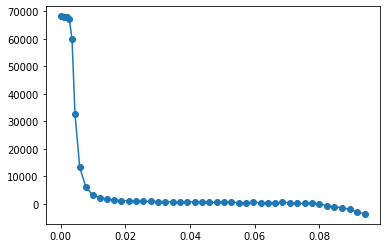

In [118]:
strain,stress,work_hard=calc_work_hard(data['T6_6'])
plt.figure()
plt.plot(strain, work_hard,'-o');

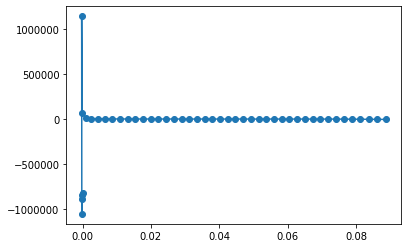

In [119]:
strain,stress,work_hard=calc_work_hard_correct(data['T6_6'])
plt.figure()
plt.plot(strain, work_hard,'-o')

In [120]:
custom_cycler = (cycler(color=['tab:green']*2+['tab:olive']*2+['tab:blue']*2+['tab:cyan']*2+['tab:orange'])+
                 cycler(linestyle=[':','-',':','-',':','-',':','-','-']))
def plot_work_hard(data,n=50):
    fig,ax= plt.subplots()
    ax.set_prop_cycle(custom_cycler)
    for test, values in sorted(data.items()):
        strain,stress,work_hard=calc_work_hard(values,n=n)
        m=int(n/10)
        work_hard=np.convolve(work_hard, np.ones((m,))/m, mode='same')
        ax.plot(strain, work_hard)
    ax.set_ylim([0,10000])
    plt.legend(sorted(data.keys()))

In [121]:
custom_cycler = (cycler(color=['tab:green']*2+['tab:olive']*2+['tab:blue']*2+['tab:cyan']*2+['tab:orange'])+
                 cycler(linestyle=[':','-',':','-',':','-',':','-','-']))
def plot_work_hard_correct(data,n=50):
    fig,ax= plt.subplots()
    ax.set_prop_cycle(custom_cycler)
    for test, values in sorted(data.items()):
        strain,stress,work_hard=calc_work_hard_correct(values,n=n)
        m=int(n/10)
        work_hard=np.convolve(work_hard, np.ones((m,))/m, mode='same')
        ax.plot(strain, work_hard)
    ax.set_ylabel('Work hardening rate (MPa)')
    ax.set_xlabel('Strain')
    ax.set_axisbelow(True)
    ax.set_ylim([0,4000])
    ax.set_xlim(0.005,0.13)
    ax.yaxis.grid(color='gray', linestyle='dashed',alpha=0.5)
    ax.xaxis.grid(color='gray', linestyle='dashed', alpha=0.5)
    plt.legend(sorted(data.keys()))
    return fig

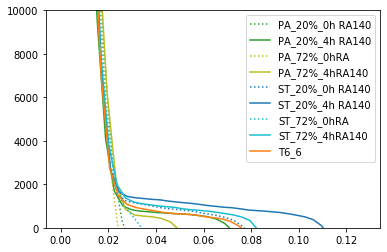

In [122]:
plot_work_hard(data,n=80)

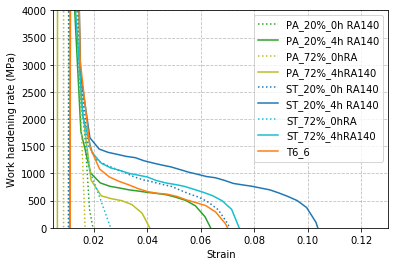

In [123]:
work_hardening_all=plot_work_hard_correct(data,n=80)

In [124]:
work_hardening_all.savefig('work_hardening_curves.png',dpi=150)

## Compare work hardening data with different filtering

In [65]:
custom_cycler = (cycler(color=['tab:green']*2+['tab:olive']*2+['tab:blue']*2+['tab:cyan']*2+['tab:orange'])+
                 cycler(linestyle=[':','-',':','-',':','-',':','-','-']))
def plot_work_hard_comp(data):
    fig,ax= plt.subplots(figsize=(12,6))
    ax.set_prop_cycle(custom_cycler)
    for a,n in zip([1,0.5,0.25],[80,70,60]):
        for test, values in sorted(data.items()):
            strain,stress,work_hard=calc_work_hard(values,n=n)
            m=int(n/8)
            work_hard=np.convolve(work_hard, np.ones((m,))/m, mode='same')
            ax.plot(strain, work_hard,alpha=a)
            ax.set_ylim([0,4000])
    plt.legend(sorted(data.keys()))

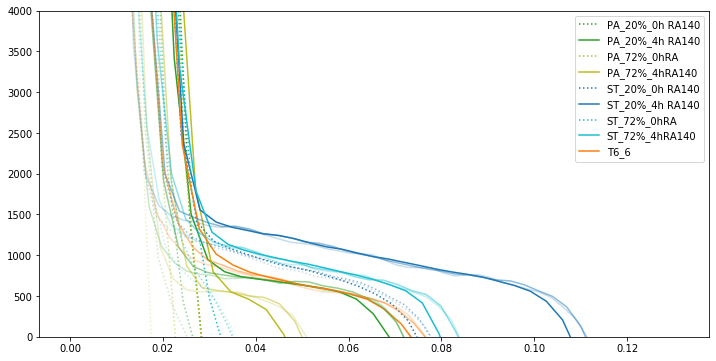

In [66]:
plot_work_hard_comp(data)